In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,StackingRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [18]:
df=pd.read_csv("C:/Users/saran/Downloads/DS_C12_S1_Regression_Insurance_Data_Project.csv")
df.head()         #loading the csv file into DataFrame and displaying first five records

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [19]:
df.shape          # checking for number of rows and columns in dataframe

(1338, 8)

In [20]:
df.info()      # to obtain information summary of dataframe., like column names, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [21]:
df.isnull().sum()    # checking for sum of null values in each column

age         0
gender      0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df['classif'].fillna(df['classif'].mode()[0], inplace=True)  # replaces the null values in 'classif' column with mode as its a categorical column

In [23]:
df.duplicated().sum() #checkiing fr any duplicated records

1

In [25]:
dup_records = df.duplicated()
print(df[dup_records])


     age gender    bmi classif  children smoker     region    charges
581   19   male  30.59     OB1         0     no  northwest  1639.5631


In [8]:

df.drop_duplicates(keep='first',inplace=True)   # dropping the duplicated records keeping intact the first record

In [9]:
df.describe()    # to get summary statistics of the data

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.148841,30.663452,1.095737,13279.121487
std,14.954106,6.100468,1.205571,12110.359656
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,190.000000,53.130000,5.000000,63770.428010


## EDA

In [10]:
obj = list(df.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['gender', 'classif', 'smoker', 'region']

In [11]:
num = list(df.select_dtypes(include=['int64','float64']).columns)  #creating a list of all columns with datatype as int or float
num

['age', 'bmi', 'children', 'charges']

In [13]:
def count(*s):                           # defining a function for plotting countplot
    for column in obj:
        sns.countplot(data=df, x=column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count Plot of {column}')
       # plt.xticks(rotation=45)
        plt.show()

In [14]:
def hist(*s):                             # defining a function for Plotting Histogram and boxplot
    for column in num:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=column, kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=column)
        plt.ylabel(column)
        plt.title(f'Box Plot of {column}')
        plt.show()

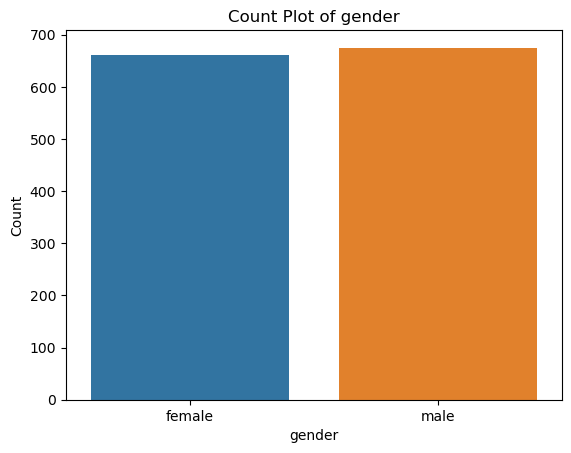

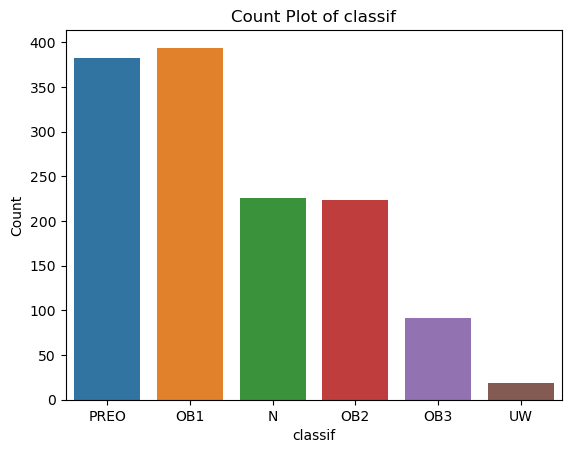

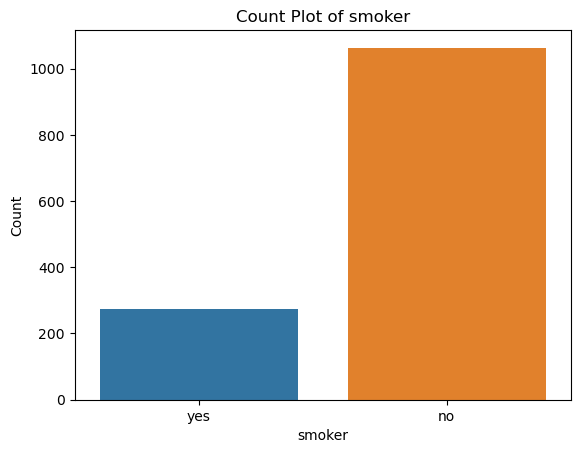

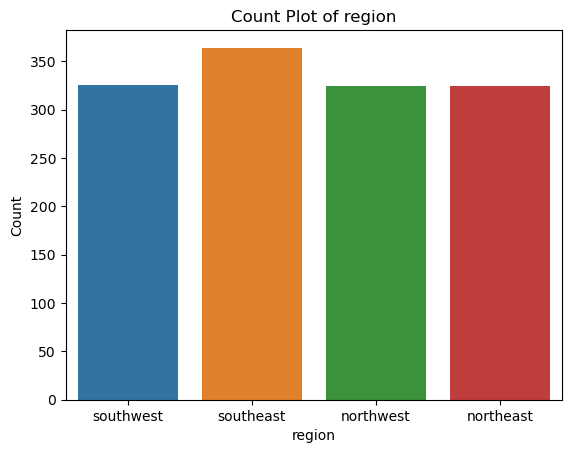

In [15]:

count(obj)                   #passing the objecct columns

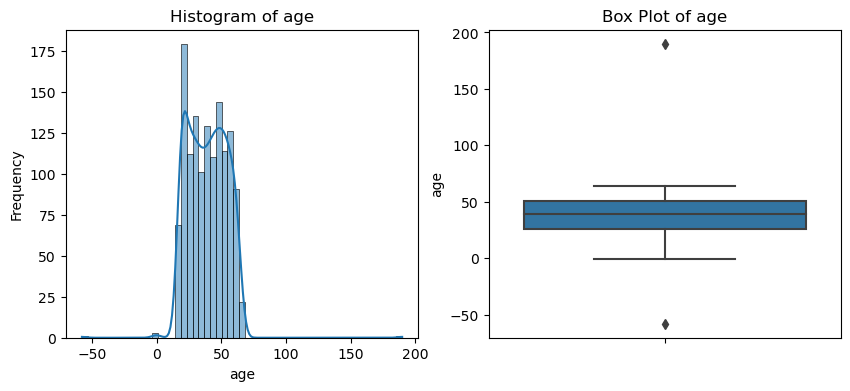

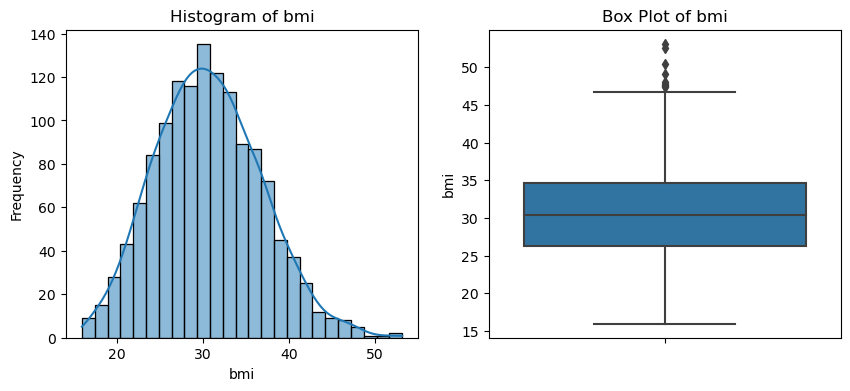

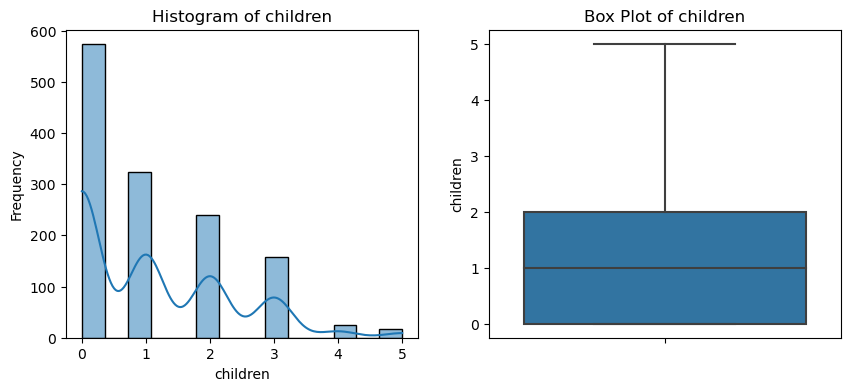

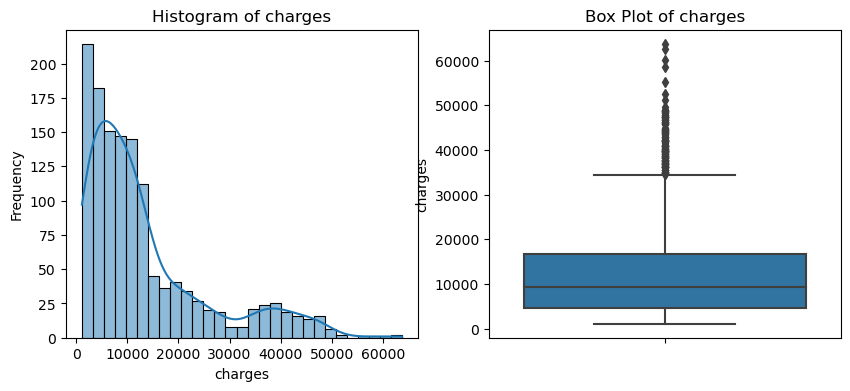

In [17]:
hist(num)

In [18]:
df.drop(df[(df['age'] == 0) | (df['age'] < 0) | (df['age'] > 97)].index, inplace=True)  #treating outliers of age column

<AxesSubplot:ylabel='age'>

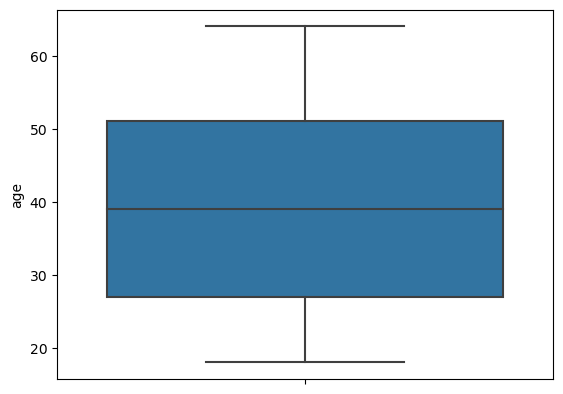

In [19]:
sns.boxplot(data=df, y='age')

In [ ]:
#bivariate

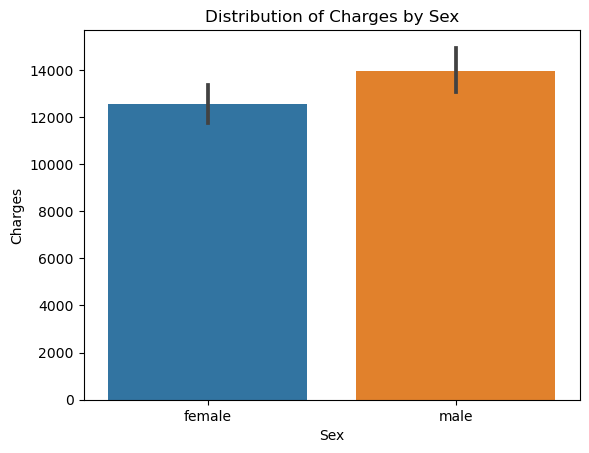

In [20]:
sns.barplot(x='gender', y='charges', data=df)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Sex')
plt.show()

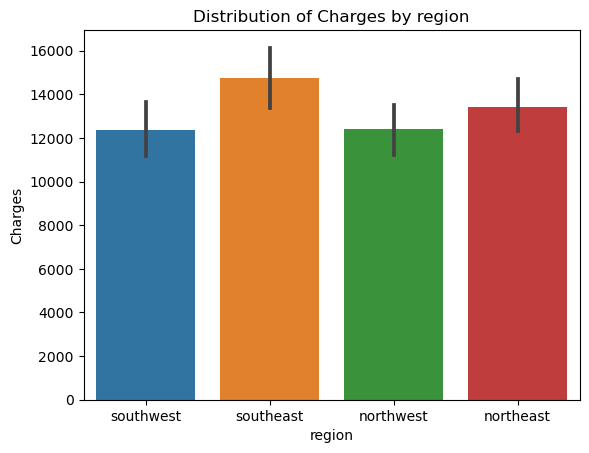

In [21]:
sns.barplot(x='region', y='charges', data=df)
plt.xlabel('region')
plt.ylabel('Charges')
plt.title('Distribution of Charges by region')
plt.show()

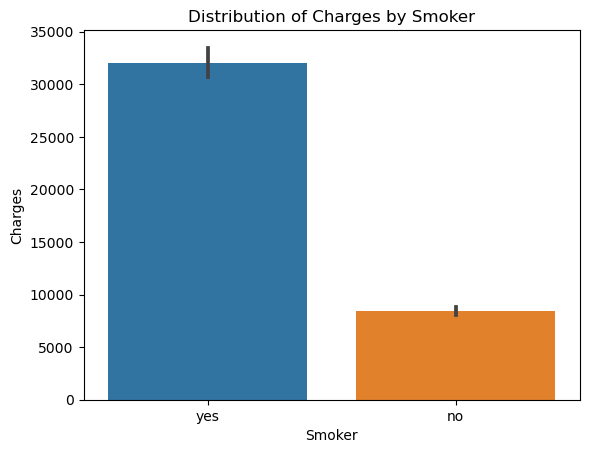

In [22]:
sns.barplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Smoker')
plt.show()

The premium charges are same for customers of both genders. 
Smokers have high premium charges compared to that of non smokers

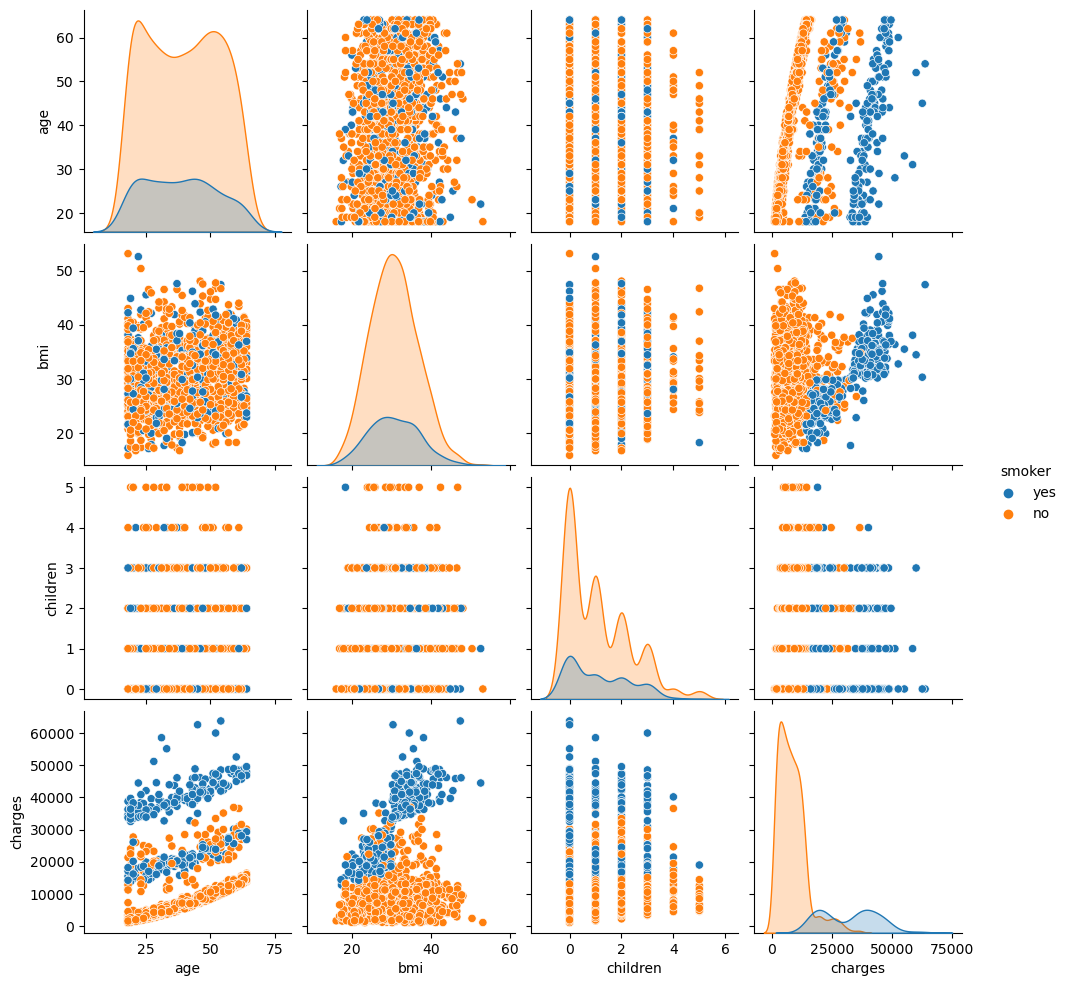

In [24]:
sns.pairplot(df,hue='smoker')

In [30]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    df[i]=LabelEncoder().fit_transform(df[i])
df.head(3)

,age,gender,bmi,classif,children,smoker,region,charges
0,19.0,0,27.90,4,0,1,3,16884.9240
1,18.0,1,33.77,1,1,0,2,1725.5523
2,28.0,1,33.00,1,3,0,2,4449.4620


In [31]:
s_df=pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)    # sacling the data using minmax scaler
s_df.head()

,age,gender,bmi,classif,children,smoker,region,charges
0,0.285714,0.0,0.321227,0.8,0.0,1.0,1.000000,0.251611
1,0.269841,1.0,0.479150,0.2,0.2,0.0,0.666667,0.009636
2,0.428571,1.0,0.458434,0.2,0.6,0.0,0.666667,0.053115
3,0.603175,1.0,0.181464,0.0,0.0,0.0,0.333333,0.333010
4,0.492063,1.0,0.347592,0.8,0.0,0.0,0.333333,0.043816


In [32]:
cor_matrix=s_df.corr()    # calculating the correlation matrix
cor_matrix

,age,gender,bmi,classif,children,smoker,region,charges
age,1.000000,-0.018354,0.110604,0.008246,0.044077,-0.032068,0.003854,0.293367
gender,-0.018354,1.000000,0.046397,-0.007215,0.017848,0.076596,0.004936,0.058044
bmi,0.110604,0.046397,1.000000,0.084326,0.012755,0.003746,0.157574,0.198401
classif,0.008246,-0.007215,0.084326,1.000000,-0.027976,-0.009675,0.013767,-0.037438
children,0.044077,0.017848,0.012755,-0.027976,1.000000,0.007331,0.016258,0.067389
smoker,-0.032068,0.076596,0.003746,-0.009675,0.007331,1.000000,-0.002358,0.787234
region,0.003854,0.004936,0.157574,0.013767,0.016258,-0.002358,1.000000,-0.006547
charges,0.293367,0.058044,0.198401,-0.037438,0.067389,0.787234,-0.006547,1.000000


<AxesSubplot:>

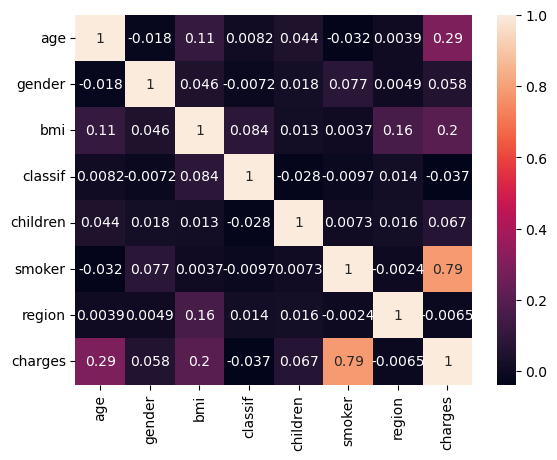

In [33]:
sns.heatmap(cor_matrix,annot=True)   # plotting a heat map to visualise the correlation

In [79]:
X=s_df.drop('charges',axis=1)       #
y=df["charges"] 

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   # Splitting the data into training and testing data

In [81]:
print(X_train.shape)
print(y_test.shape)

(935, 7)
(402,)


### Linear Regression

In [82]:
model1=LinearRegression().fit(X_train,y_train)     #creating a model using linear regression and fitting the data
print("Intercept:",model1.intercept_)
print("slope:",model1.coef_)

Intercept: -5387.994319305519
slope: [15914.7626565    -92.54947901 12356.83095554 -2151.81539865
  2622.48595623 22865.75803195  -862.89142358]


In [83]:
y_pred=model1.predict(X_test)   # predicting target variable / outut using the trained model

In [84]:
print("R_square Training data:",model1.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",model1.score(X_test,y_test))

R_square Training data: 0.7390794411836961
R_square Test data: 0.7719394938769457


In [85]:
adj_r2train=1-(1-(model1.score(X_train,y_train)))*(935-1)/(935-7-1)
adj_r2test=1-(1-(model1.score(X_test,y_test)))*(402-1)/(402-7-1)

In [86]:
print('adj r score training : ',adj_r2train)
print('adj r score test : ',adj_r2test)

adj r score training :  0.7371091672767769
adj r score test :  0.7678876574737442


In [87]:
RMSE=mean_squared_error(y_test,y_pred,squared=False)  # printing evaluation metrics score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
print("RMSE:",RMSE)
print("MSE:",MSE)
print("MAE:",MAE)
print("MAPE:",MAPE)

RMSE: 6247.014576794895
MSE: 39025191.1226879
MAE: 4225.636995990638
MAPE: 0.41336624139636624


### Decission tree

In [88]:
kf=KFold(n_splits=5)     # Creating a KFold cross-validation with 5 folds

In [63]:
param_grid={'min_samples_split':[10,20,30],
           'min_samples_leaf':[20,40,100]}

In [64]:
dmodel=DecisionTreeRegressor(max_depth=4,random_state=42).fit(X_train,y_train)

In [82]:
grid_cv=GridSearchCV(dmodel,param_grid,cv=kf)

In [106]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30]})

In [107]:
grid_cv.best_score_

0.8412982599703053

In [108]:
grid_cv.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10,
                      random_state=42)

In [112]:
dmodel2=DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10).fit(X_train,y_train)
y_pred2=dmodel2.predict(X_test)           #fitting model on optimal hyperparameters


In [90]:
print("R_square Training data:",dmodel2.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",dmodel2.score(X_test,y_test))

R_square Training data: 0.8668972505421157
R_square Test data: 0.8681882832450224


In [91]:
RMSE=mean_squared_error(y_test,y_pred2,squared=False)
MSE=mean_squared_error(y_test,y_pred2)
MAE=mean_absolute_error(y_test,y_pred2)
MAPE=mean_absolute_percentage_error(y_test,y_pred2)
print("M2 RMSE:",RMSE)
print("M2 MSE:",MSE)
print("M2 MAE:",MAE)
print("M2 MAPE:",MAPE)

M2 RMSE: 4749.24403202863
M2 MSE: 22555318.875759553
M2 MAE: 2730.6108536500487
M2 MAPE: 0.2922570844547232


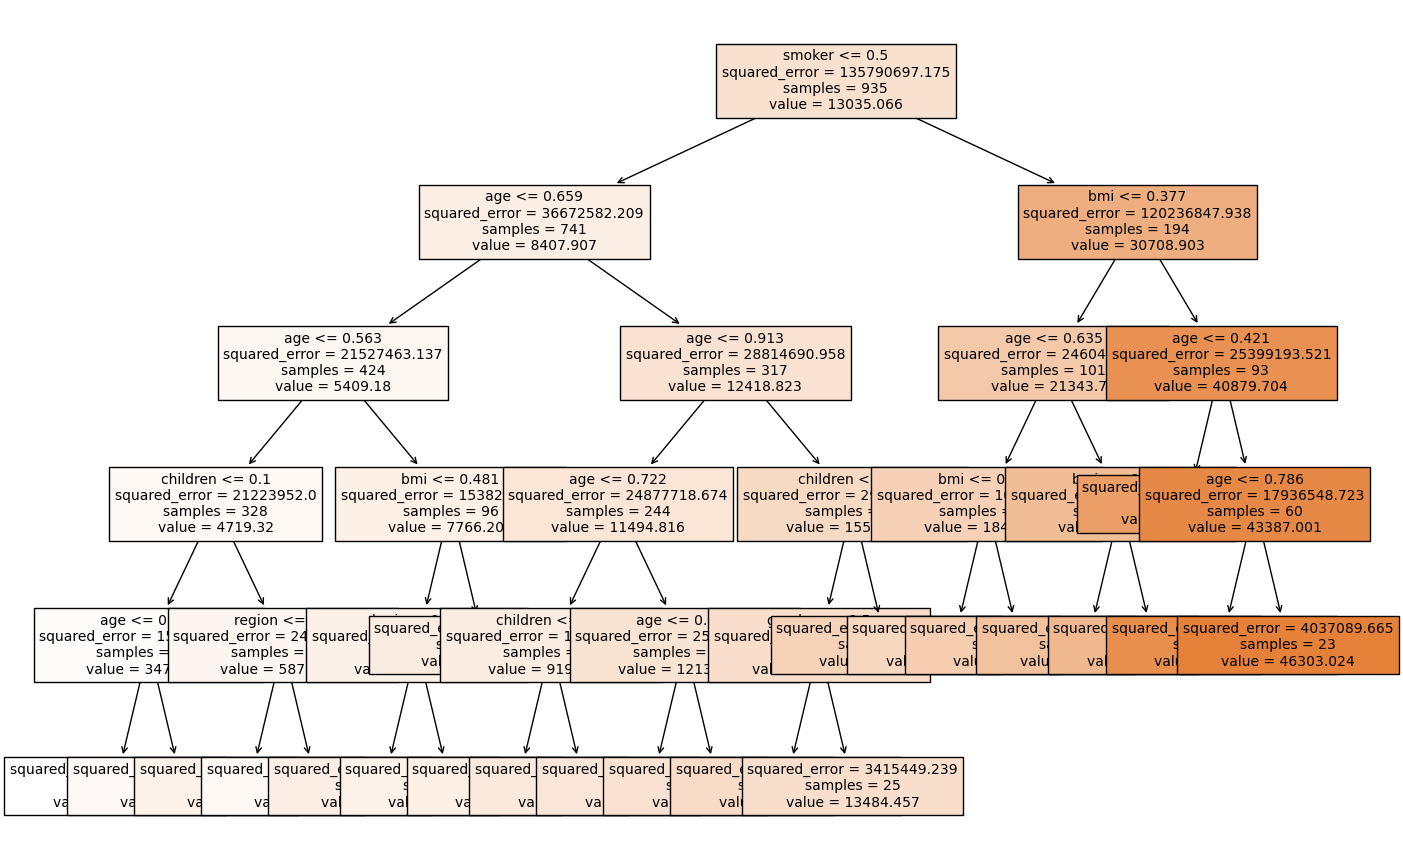

In [264]:
from sklearn import tree
plt.figure(figsize=(16,11))
tree.plot_tree(dmodel2,max_depth=5,feature_names=df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

### Random forest

In [115]:
param_grid2 = {'n_estimators': [20,40,50,80,100,150,200],
    'max_depth': [4,5,6,8,9,10],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10, 20, 40,],}

In [116]:
rf=RandomForestRegressor(random_state=42)

In [117]:
grid_cv2=GridSearchCV(rf,param_grid2,cv=5)

In [118]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [20, 40, 50, 80, 100, 150, 200]})

In [119]:
grid_cv2.best_score_

0.8514696875488991

In [120]:
grid_cv2.best_estimator_  #getting best param estimates

RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=80, random_state=42)

In [113]:
rfmodel=RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,n_estimators=80)
rfmodel.fit(X,y)
y_pred3=rfmodel.predict(X_test)
print("R_square Training data:",rfmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",rfmodel.score(X_test,y_test))

R_square Training data: 0.866852168224696
R_square Test data: 0.8856823314787263


In [163]:
RMSE=mean_squared_error(y_test,y_pred3,squared=False)
MSE=mean_squared_error(y_test,y_pred3)
MAE=mean_absolute_error(y_test,y_pred3)
MAPE=mean_absolute_percentage_error(y_test,y_pred3)
print("M3 RMSE:",RMSE)
print("M3 MSE:",MSE)
print("M3 MAE:",MAE)
print("M3 MAPE:",MAPE)

M3 RMSE: 4413.953323699519
M3 MSE: 19482983.943798035
M3 MAE: 2466.6436559094996
M3 MAPE: 0.2928723606469671


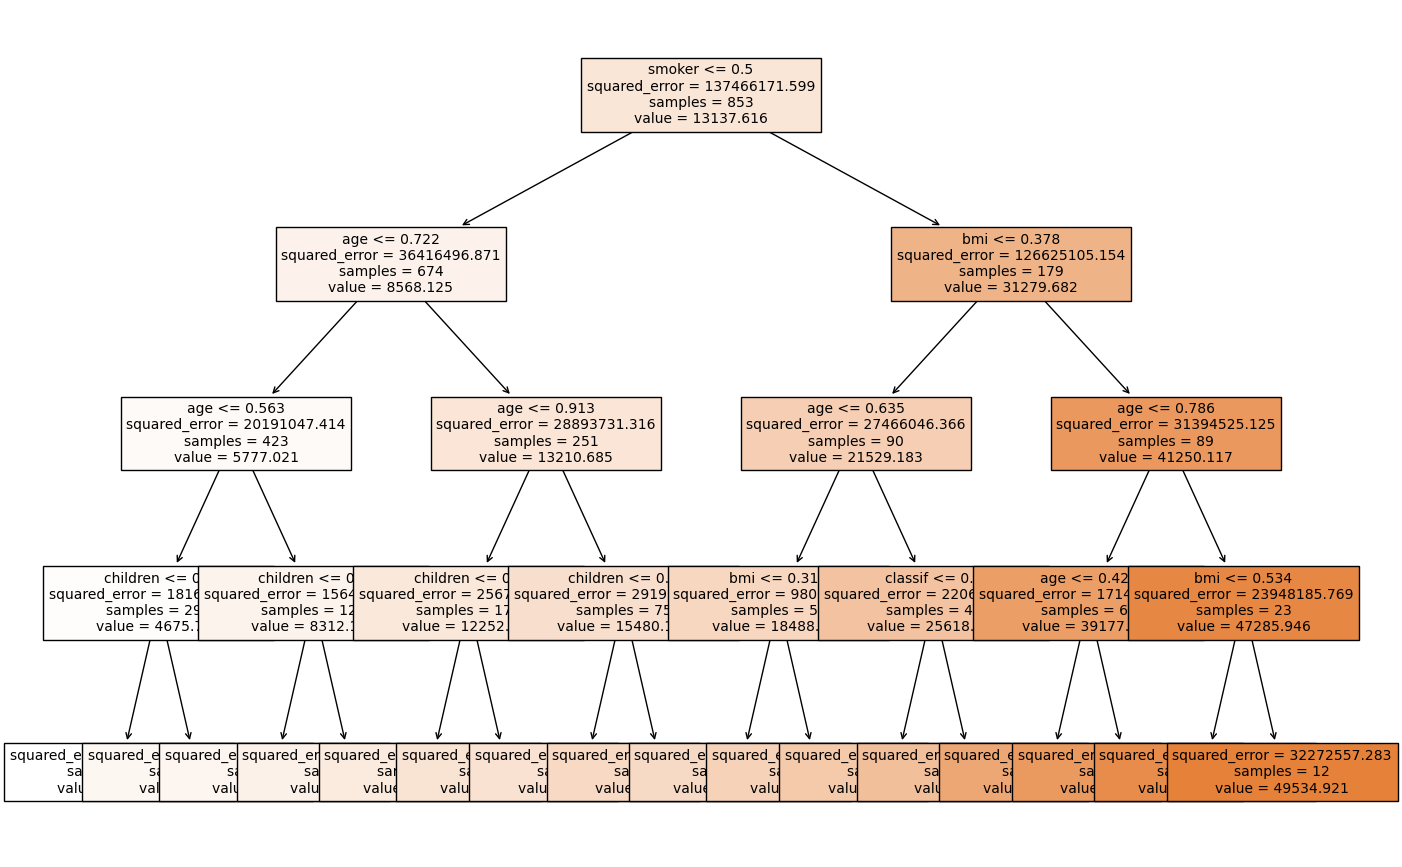

In [261]:
from sklearn import tree
plt.figure(figsize=(16,11))
tree.plot_tree(rfmodel[0],max_depth=4,feature_names=df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

### KN Regressor

In [1]:
for i in range(1, 15):
    score = cross_val_score(KNeighborsRegressor(n_neighbors=i), X,y, cv=kf)
    print(f"n_neighbors: {i}, Mean Score: {np.mean(score)}")

NameError: name 'cross_val_score' is not defined

In [94]:
kmodel=KNeighborsRegressor(n_neighbors=6).fit(X_train,y_train)  #fitting the model

In [95]:
y_pred4=kmodel.predict(X_test)

In [96]:
print("R_square Training data:",kmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",kmodel.score(X_test,y_test))

R_square Training data: 0.8683841024732787
R_square Test data: 0.8424067637923929


In [97]:
RMSE=mean_squared_error(y_test,y_pred4,squared=False)
MSE=mean_squared_error(y_test,y_pred4)
MAE=mean_absolute_error(y_test,y_pred4)
MAPE=mean_absolute_percentage_error(y_test,y_pred4)
print("M4 RMSE:",RMSE)
print("M4 MSE:",MSE)
print("M4 MAE:",MAE)
print("M4 MAPE:",MAPE)

M4 RMSE: 5192.97538956195
M4 MSE: 26966993.39659608
M4 MAE: 3078.3107724684905
M4 MAPE: 0.3489220741032098


### Stacking

In [98]:
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor(n_neighbors=6)))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=5 ,min_samples_leaf=20,min_samples_split=10, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,n_estimators=80, random_state=42)))
level2=LinearRegression()
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [99]:
smodel=stack_model.fit(X_train,y_train)
y_preds=smodel.predict(X_test)

In [100]:
score=cross_val_score(stack_model,X,y,scoring='r2',cv=kf)
print(score)

[0.88577742 0.80676995 0.88884012 0.8478177  0.87186816]


In [101]:
print('R Score:', np.mean(score))

R Score: 0.860214669234862


In [102]:
print("R_square Training data:",smodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",smodel.score(X_test,y_test))

R_square Training data: 0.8714436878684464
R_square Test data: 0.873297856636825


In [103]:
RMSE=mean_squared_error(y_test,y_preds,squared=False)
MSE=mean_squared_error(y_test,y_preds)
MAE=mean_absolute_error(y_test,y_preds)
MAPE=mean_absolute_percentage_error(y_test,y_preds)
print("M5 RMSE:",RMSE)
print("M5 MSE:",MSE)
print("M5 MAE:",MAE)
print("M5 MAPE:",MAPE)

M5 RMSE: 4656.2839676542
M5 MSE: 21680980.387433536
M5 MAE: 2570.948931895804
M5 MAPE: 0.2826391939664622


#### Cross val scores

In [104]:
STscore=cross_val_score(stack_model,X,y,scoring='r2',cv=kf)
STscore=(np.mean(STscore))

In [105]:
RFscore=cross_val_score(rfmodel,X,y,scoring='r2',cv=kf)
RFscore=(np.mean(RFscore))

In [106]:
DTscore=cross_val_score(dmodel2,X,y,scoring='r2',cv=kf)
DTscore=(np.mean(DTscore))

In [107]:
Lscore=cross_val_score(model1,X,y,scoring='r2',cv=kf)
Lscore=(np.mean(Lscore))

In [108]:
Kscore=cross_val_score(kmodel,X,y,scoring='r2',cv=kf)
Kscore=(np.mean(Kscore))

In [109]:

model=['Stacked','Random forest','Decision tree','Linear regression','K neighbour']
mscores=[STscore,RFscore,DTscore,Lscore,Kscore]

In [115]:
dfscores = pd.DataFrame({'Model': model, 'Score': mscores})
dfscores.sort_values(by='Score',ascending=False)

,Model,Score
0,Stacked,0.860215
1,Random forest,0.859323
2,Decision tree,0.852167
4,K neighbour,0.815466
3,Linear regression,0.748523


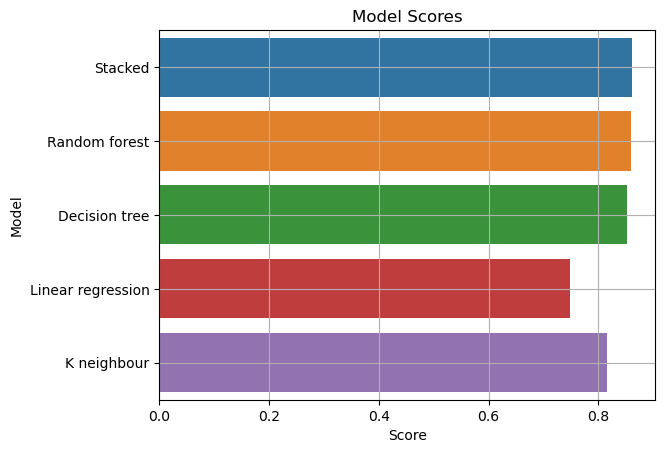

In [117]:
sns.barplot(y=dfscores['Model'],x= dfscores['Score'],orient='h')
plt.ylabel('Model')
plt.xlabel('Score')
plt.title('Model Scores')
plt.show()